<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module5/SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Softmax Regression**
Softmax Regression (also known as **Multinomial Logistic Regression**) is an extension of **Logistic Regression** used for **multi-class classification problems**. Unlike binary logistic regression, which predicts two classes (0 or 1), **Softmax Regression** assigns probabilities to multiple classes.

### **Softmax Function**
The **Softmax function** converts raw model outputs (logits) into a probability distribution across multiple classes:

$$
P(y_i | X) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

where:
- $ z_i $ is the **logit score** (raw output of the model for class $ i $).
- $ K $ is the total number of classes.
- The denominator sums over all exponentiated logits to normalize them into probabilities.

Each output probability satisfies:
$$ \sum_{i=1}^{K} P(y_i | X) = 1 $$

### **Loss Function: Categorical Cross-Entropy**
Softmax Regression is trained using the **Categorical Cross-Entropy Loss**, which measures how well the predicted probability distribution matches the true class labels:

$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(\hat{y}_{ij})
$$

where:
- $ N $ is the number of samples.
- $ K $ is the number of classes.
- $ y_{ij} $ is **1 if the true class is $ j $, else 0**.
- $ \hat{y}_{ij} $ is the predicted probability for class $ j $.

### **Key Features**
- **Used for multi-class classification** problems where classes are **mutually exclusive**.
- **Outputs a probability distribution** over all possible classes.
- **Generalizes Logistic Regression** to handle more than two classes.

#Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Data

###Load data

In [45]:
df = pd.read_csv('creditcard.csv')

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


###Split X, y

In [46]:
dataset_arr = df.to_numpy()

X = dataset_arr[:, :-1].astype(np.float64)
y = dataset_arr[:, -1].astype(np.uint8)

###Encode X and y

Add bias to X

In [47]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

Use one-hot encoding on y

In [48]:
n_classes = np.unique(y, axis = 0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)

y_encoded[np.arange(n_samples), y] = 1

In [49]:
print(X_b.shape)

(284807, 31)


###Split train, val, test

In [57]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded,
                                                  test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                  test_size=test_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

In [58]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 199364
Number of val samples: 56962
Number of test samples: 28481


###Normalize the data

In [59]:
normalizer = StandardScaler()

#We don't normalize the bias
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

##Implementation without Pytorch

###Softmax function

In [41]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum(axis=1)[:, None]

###Predict

In [20]:
def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

###Loss

In [37]:
def compute_loss(y_hat, y):
  n = y.shape[0]
  return -(1/n) * np.sum(y * np.log(y_hat))

###Gradient

In [24]:
def compute_gradient(X, y_hat, y):
  n = X.shape[0]

  return np.dot(X.T, (y_hat - y)) / n

###Update theta

In [23]:
def update_theta(theta, gradient, learning_rate):
  return theta - learning_rate * gradient

###Accuracy

In [22]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis =1) == np. argmax(y, axis = 1)).mean()
  return acc

###Main function

In [64]:
from tqdm import tqdm

def SoftmaxRegression(X_train, y_train, X_val, y_val,
                      old_theta, batch_size, lr, epochs):
  theta = old_theta.copy()
  train_accs = []
  train_losses = []
  val_accs = []
  val_losses = []

  for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []

    for i in range(0, X_train.shape[0], batch_size):
      X_batch = X_train[i:i+batch_size]
      y_batch = y_train[i:i+batch_size]

      y_hat = predict(X_batch, theta)
      loss = compute_loss(y_hat, y_batch)
      gradient = compute_gradient(X_batch, y_hat, y_batch)
      theta = update_theta(theta, gradient, lr)
      train_batch_losses.append(loss)
      train_batch_accs.append(compute_accuracy(X_train, y_train, theta))

      val_batch_losses.append(compute_loss(predict(X_val, theta), y_val))
      val_batch_accs.append(compute_accuracy(X_val, y_val, theta))

    train_batch_loss = np.mean(train_batch_losses)
    val_batch_loss = np.mean(val_batch_losses)
    train_losses.append(np.mean(train_batch_losses))
    train_accs.append(np.mean(train_batch_accs))
    val_losses.append(np.mean(val_batch_losses))
    val_accs.append(np.mean(val_batch_accs))

    print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')

  return theta, train_accs, train_losses, val_accs, val_losses

##Test model

###Run

In [55]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
  size =(n_features, n_classes)
)

In [65]:
theta, train_acs, train_losses, val_acs, val_losses = SoftmaxRegression(X_train, y_train,
                                                                        X_val, y_val, theta,
                                                                        batch_size, lr, epochs)


EPOCH 1:	Training loss: 0.477	Validation loss : 0.470

EPOCH 2:	Training loss: 0.196	Validation loss : 0.193

EPOCH 3:	Training loss: 0.111	Validation loss : 0.110

EPOCH 4:	Training loss: 0.076	Validation loss : 0.075

EPOCH 5:	Training loss: 0.059	Validation loss : 0.058

EPOCH 6:	Training loss: 0.048	Validation loss : 0.047

EPOCH 7:	Training loss: 0.041	Validation loss : 0.041

EPOCH 8:	Training loss: 0.036	Validation loss : 0.035

EPOCH 9:	Training loss: 0.032	Validation loss : 0.032

EPOCH 10:	Training loss: 0.029	Validation loss : 0.029

EPOCH 11:	Training loss: 0.027	Validation loss : 0.026

EPOCH 12:	Training loss: 0.025	Validation loss : 0.024

EPOCH 13:	Training loss: 0.023	Validation loss : 0.022

EPOCH 14:	Training loss: 0.022	Validation loss : 0.021

EPOCH 15:	Training loss: 0.020	Validation loss : 0.020

EPOCH 16:	Training loss: 0.019	Validation loss : 0.019

EPOCH 17:	Training loss: 0.018	Validation loss : 0.018

EPOCH 18:	Training loss: 0.018	Validation loss : 0.017



###Visualize

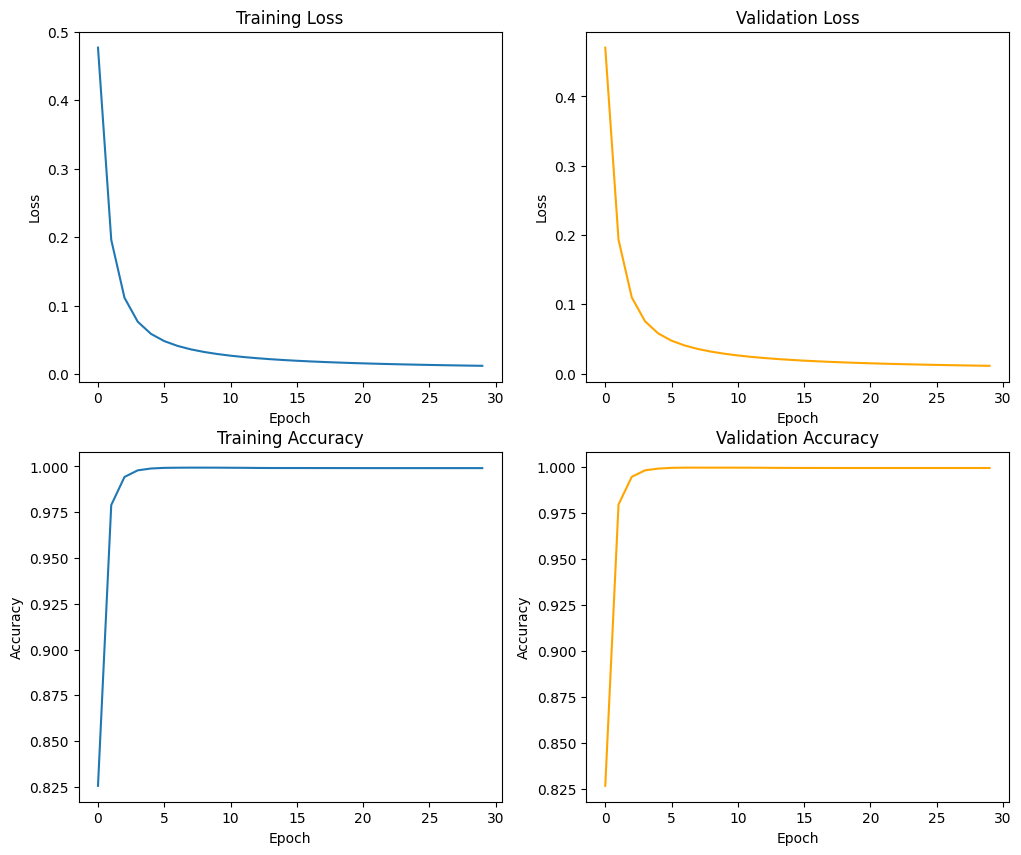

In [67]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel = 'Loss')
ax[0, 0].set_title ('Training Loss')

ax[0, 1].plot (val_losses, 'orange')
ax[0, 1].set ( xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title ('Validation Loss')

ax[1, 0].plot ( train_acs )
ax[1, 0].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title ('Training Accuracy')

ax[1, 1].plot (val_acs, 'orange')
ax[1, 1].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

###Evaluate

In [68]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print('Evaluation on validation and test set:')
print(f'Accuracy: { val_set_acc }')
print(f'Accuracy: { test_set_acc }')

Evaluation on validation and test set:
Accuracy: 0.9992802219023208
Accuracy: 0.9992626663389628


#Twitter Sentiment Analysis

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Data

###Load data

In [69]:
df = pd.read_csv('Twitter_Data.csv')

df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


##Preprocess data

###Remove NaN

In [71]:
df = df.dropna()

df.shape

(162969, 2)

###Normalize the text

In [72]:
def text_normalize(text):
  # Lowercasing
  text = text.lower()

  # Retweet old acronym "RT" removal
  text = re.sub(r'^rt[\s]+', '', text )

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\ r\n]*', '', text )

  # Punctuation removal
  text = re.sub(r'[^\w\s]','',text)

  # Stopwords removal
  stop_words = stopwords.words('english')
  words = text.split()
  words = [word for word in words if word not in stop_words]
  text = ' '.join(words)

  # Stemming
  stemmer = SnowballStemmer('english')
  words = text.split()
  words = [stemmer.stem(word) for word in words]
  text = ' '.join(words)

  return text

In [73]:
df['clean_text'] = df['clean_text'].apply(text_normalize)

<ipython-input-73-9fa84bbabc96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(text_normalize)


###TF-IDF vectorizer

In [75]:
vectorizer = TfidfVectorizer(max_features =2000)

X = vectorizer.fit_transform(df['clean_text']).toarray()

###Add bias to X

In [76]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

###One-hot encoding to y

In [78]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

###Split train, val, test

In [82]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y_encoded, dtype=torch.float32)

In [83]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [80]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 114078
Number of val samples: 32594
Number of test samples: 16297


##Implementation with Torch

###Model class

In [84]:
class SoftmaxRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(SoftmaxRegression, self).__init__()
    self.linear = nn.Linear(
        input_dim,
        output_dim,
        bias = True
    )

  def forward(self, x):
    return self.linear(x)

In [85]:
def compute_accuracy(y_hat, y_true):
  #torch.max(...) return value, index
  _, y_hat = torch.max(y_hat, dim=1)
  _, y_true = torch.max(y_true, dim=1)

  correct = (y_hat == y_true).sum().item()

  accuracy = (correct / len(y_true))

  return accuracy

###Define the model

In [88]:
lr = 0.1
epochs = 500
torch.manual_seed(random_state)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model = SoftmaxRegression(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    model.parameters(), lr=lr
)

###Main function

In [90]:
def train_softmax_regression(model, X_train, y_train, X_val, y_val):
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []

  for epoch in range(epochs):
    model.train()

    #Zero the gradient
    optimizer.zero_grad()

    #Forward pass
    y_hat = model(X_train)

    #Compute loss
    train_loss = criterion(y_hat, y_train)
    train_losses.append(train_loss.item())

    train_acc = compute_accuracy(y_hat, y_train)
    train_accs.append(train_acc)

    #Backward pass and optimization
    train_loss.backward()
    optimizer.step()

    #Forward pass for validation data
    model.eval()

    with torch.no_grad():
      y_val_hat = model(X_val)

      # Compute validation loss
      val_loss = criterion(y_val_hat, y_val)
      val_losses.append(val_loss.item())

      val_acc = compute_accuracy(y_val_hat, y_val)
      val_accs.append(val_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}')

  return model, train_losses, val_losses, train_accs, val_accs

##Test model

###Run

In [91]:
model, train_losses, val_losses, train_accs, val_accs = train_softmax_regression(
    model,
    X_train,
    y_train,
    X_val,
    y_val)


EPOCH 1:	Training loss: 1.095	Validation loss: 1.093

EPOCH 2:	Training loss: 1.093	Validation loss: 1.091

EPOCH 3:	Training loss: 1.091	Validation loss: 1.089

EPOCH 4:	Training loss: 1.089	Validation loss: 1.087

EPOCH 5:	Training loss: 1.087	Validation loss: 1.085

EPOCH 6:	Training loss: 1.085	Validation loss: 1.083

EPOCH 7:	Training loss: 1.083	Validation loss: 1.081

EPOCH 8:	Training loss: 1.082	Validation loss: 1.080

EPOCH 9:	Training loss: 1.080	Validation loss: 1.078

EPOCH 10:	Training loss: 1.079	Validation loss: 1.077

EPOCH 11:	Training loss: 1.078	Validation loss: 1.076

EPOCH 12:	Training loss: 1.077	Validation loss: 1.075

EPOCH 13:	Training loss: 1.075	Validation loss: 1.074

EPOCH 14:	Training loss: 1.074	Validation loss: 1.073

EPOCH 15:	Training loss: 1.073	Validation loss: 1.072

EPOCH 16:	Training loss: 1.072	Validation loss: 1.071

EPOCH 17:	Training loss: 1.072	Validation loss: 1.070

EPOCH 18:	Training loss: 1.071	Validation loss: 1.069

EPOCH 19:	Training

###Visualize

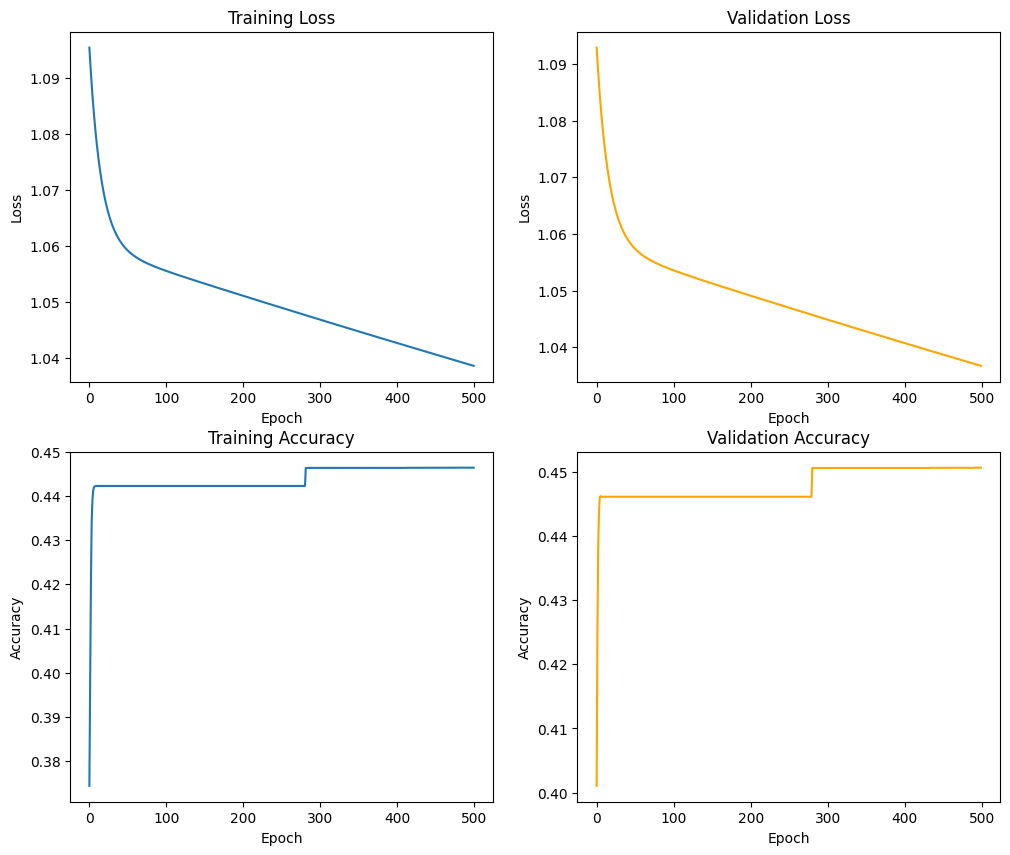

In [97]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel = 'Loss')
ax[0, 0].set_title ('Training Loss')

ax[0, 1].plot (val_losses, 'orange')
ax[0, 1].set ( xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title ('Validation Loss')

ax[1, 0].plot ( train_accs )
ax[1, 0].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title ('Training Accuracy')

ax[1, 1].plot (val_accs, 'orange')
ax[1, 1].set ( xlabel ='Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title ('Validation Accuracy')

plt.show()

###Evaluate

In [95]:
with torch.no_grad():
  y_test_hat = model(X_test)
  y_val_hat = model(X_val)

test_acc = compute_accuracy(y_test_hat, y_test)
val_acc = compute_accuracy(y_val_hat, y_val)

print('Evaluation on validation and test set:')
print(f'Accuracy: {test_acc}')
print(f'Accuracy: {val_acc}')

Evaluation on validation and test set:
Accuracy: 0.4491010615450696
Accuracy: 0.4506657667055286
